In [2]:
!pip install pandas

You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install keras

You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached rich-13.7.0-py3-none-any.whl (240 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)


You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [98]:
!pip install tensorflow

You should consider upgrading via the 'C:\Users\milam\PycharmProjects\timski\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
file_path = 'amazon_laptop_prices_v01.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [6]:
df_copy=df.copy()

In [7]:
def clean_model_column(data):
  remove = ['Dell', 'HP', 'Acer', 'Apple', 'ASUS','Asus', 'Lenovo', 'MSI', 'ROG', 'LG', 'Samsung','Laptop']
  for brand in remove:
    data['model'] = data['model'].str.replace(brand, '', case=False)
  data['model'] = data['model'].str.replace(r'\s+', '', regex=True)
  data['model'] = data['model'].str.strip()
  return data

In [8]:
def clean_cpu_column(value):
    value = 'Intel Core i3' if 'i3' in value.lower() else value
    value = 'Intel Core i5' if 'i5' in value.lower() else value
    value = 'Intel Core i9' if 'i9' in value.lower() else value
    value = 'Intel Core i7' if 'i7' in value.lower() else value
    value = 'Ryzen 3' if 'ryzen 3' in value.lower() else value
    value = 'Ryzen 5' if 'ryzen 5' in value.lower() else value
    value = 'Ryzen 7' if 'ryzen 7' in value.lower() else value
    value = 'Ryzen 9' if 'ryzen 9' in value.lower() else value
    value = 'Celeron' if 'celeron' in value.lower() else value
    value = 'Pentium' if 'pentium' in value.lower() else value
    return value

In [111]:
def clean_dataset(df_copy):
  # clean column brand
  df_copy['brand'].replace({"DELL": "Dell", "dell": "Dell"}, inplace=True)
  df_copy['brand'].replace({"LENOVO": "Lenovo", "lenovo": "Lenovo"}, inplace=True)
  df_copy['brand'].replace({"ASUS": "Asus", "asus": "Asus"}, inplace=True)
  df_copy['brand'].replace({"acer": "Acer"}, inplace=True)
  df_copy['brand'].replace({"SAMSUNG": "Samsung"}, inplace=True)
  df_copy['brand'].replace({"hp": "HP"}, inplace=True)
  df_copy['brand'].replace('Toughbook','Panasonic',inplace=True)
  # get the brands with most volume
  brand_counts = df_copy['brand'].value_counts()
  df_copy = df_copy[df_copy['brand'].isin(brand_counts[brand_counts > 6].index)]
  # clean column screen size
  df_copy.screen_size.replace(" Inches","", inplace=True, regex=True)
  df_copy.screen_size = pd.to_numeric(df_copy.screen_size)
  # clean column harddisk
  df_copy.harddisk.replace(" GB","", inplace=True, regex=True)
  df_copy.harddisk.replace(" MB","", inplace=True, regex=True)
  df_copy.harddisk.replace(" TB","000", inplace=True, regex=True)
  df_copy.harddisk.replace("1.92000","1920", inplace=True, regex=True)
  df_copy.harddisk.replace("1.5000","1500", inplace=True, regex=True)
  df_copy.harddisk = pd.to_numeric(df_copy.harddisk)
  # clean column ram
  df_copy.ram.replace(" GB","", inplace=True, regex=True)
  df_copy.ram.replace(" MB","", inplace=True, regex=True)
  df_copy.ram = pd.to_numeric(df_copy.ram)
  # clean column price
  df_copy.price = df_copy.price.str.replace('$', '')
  df_copy.price = df_copy.price.str.replace(',', '')
  df_copy.price = pd.to_numeric(df_copy.price)
  # clean column graphics
  df_copy['graphics'].replace({"Iris Xe Graphics": "Dedicated", "Nvidia GeForce RTX 3050 Ti": "Dedicated",
                             "Nvidia GeForce RTX 4070" : "Dedicated", "UHD Graphics" : "Integrated", "Nvidia GeForce RTX 3050 Ti " : "Dedicated",
                             "Radeon Graphics":"Dedicated","Nvidia RTX A3000":"Dedicated","Nvidia GeForce RTX 4090":"Dedicated",
                             "Nvidia GeForce RTX 4060":"Dedicated","Nvidia GeForce RTX 3050 ":"Dedicated","Nvidia GeForce RTX 4050":"Dedicated",
                             "Nvidia T1200":"Dedicated","Nvidia GeForce RTX A500 ":"Dedicated","T550":"Dedicated",
                             "Nvidia RTX A2000":"Dedicated","Nvidia RTX A1000":"Dedicated","RTX A1000":"Dedicated","RTX A2000":"Dedicated",
                             "Nvidia GeForce RTX 3060":"Dedicated","Nvidia Quadro RTX 3000":"Dedicated","Nvidia RTX 2000 Ada":"Dedicated",
                             "RTX 3060":"Dedicated","Radeon 680M Graphics":"Dedicated","RTX A500":"Dedicated",
                             "Intel XE":"Dedicated","Nvidia GeForce RTX 3070":"Dedicated","AMD Integrated Graphics":"Integrated",
                             "AMD RADEON RX 540":"Dedicated","Nvidia RTX A4500":"Dedicated","Nvidia GeForce MX250":"Dedicated",
                             "Nvidia GeForce RTX 4080":"Dedicated","Intel UHD Graphics":"Integrated","Nvidia GeForce GTX 1650 Ti":"Dedicated",
                             "T500,Iris Xe Graphics":"Dedicated","UHD Graphics 610":"Integrated","RTX A3000":"Dedicated",
                             "GeForce RTX 3080":"Dedicated","Iris X Graphics":"Dedicated","RTX 3080 Ti":"Dedicated",
                             "Nvidia Quadro T550":"Dedicated","Radeon 680M":"Dedicated","Nvidia RTX A4000":"Dedicated",
                             "AMD Radeon Graphics":"Integrated","Nvidia GeForce RTX 3080":"Dedicated","RTX T600":"Dedicated",
                             "T1200":"Dedicated","RTX 3050":"Dedicated","GeForce RTX 3050":"Dedicated",
                             "RTX 4070":"Dedicated","Nvidia RTX A5500":"Dedicated","RTX 3050 Ti":"Dedicated",
                             "Nvidia GeForce RTX 3070 Ti":"Dedicated","Nvidia GeForce RTX 2050":"Dedicated","Intel Arc A370M":"Dedicated",
                             "QN20-M1-R":"Dedicated","GeForce RTX 3070 ":"Dedicated","RTX A5000,UHD Graphics":"Integrated, Dedicated",
                             "Nvidia Quadro T2000":"Dedicated","AMD Radeon":"Integrated","Nvidia GeForce MX350":"Dedicated",
                             "Quadro RTX 4000 with Max-Q Design, 8GB GDDR6":"Dedicated","Nvidia GeForce MX550":"Dedicated","Nvidia GeForce RTX 3080 Ti":"Dedicated",
                             "GeForce GTX 1650":"Dedicated","Adreno 618":"Mobile DROP","Nvidia GeForce MX450":"Dedicated",
                             "RTX 2070 Super":"Dedicated","Nvidia GeForce RTX 4070, Dedicated ":"Dedicated","Intel HD Graphics 620, Integrated":"Integrated",
                             "Nvidia RTX 4000 Ada":"Dedicated","AMD Radeon RX 7600":"Dedicated","Nvidia GeForce RTX 2070 Super":"Dedicated",
                             "GT2 Graphics":"Dedicated","RTX 3070":"Dedicated","RTX A2000,UHD Graphics":"Integrated, Dedicated",
                             "RTX 4050":"Dedicated","Nvidia GeForce RTX 3050":"Dedicated","Nvidia GeForce RTX A500":"Dedicated",
                             "GeForce RTX 3070":"Dedicated","Nvidia GeForce RTX 2070":"Dedicated","NVIDIA GeForce RTX2060":"Dedicated",
                             "GeForce RTX 3050 Ti":"Dedicated","NVIDIA RTX3070":"Dedicated","RTX 2060":"Dedicated",
                             "T500,HD Graphics, Dedicated":"Integrated, Dedicated","GeForce RTX 3080 Ti":"Dedicated","Integrated intel IRIS Xe Plus GPU":"Integrated",
                             "Quadro T500":"Dedicated","GeForce RTX 3070 Ti,Iris Xe Graphics":"Integrated, Dedicated","HD Graphics, Integrated ":"Integrated",
                             "GeForce GTX 1650 Ti":"Dedicated","NVIDIA GeForce GTX 1650 4GB":"Dedicated","NVIDIA RTX 2060":"Dedicated",
                             "UHD Graphics 600":"Integrated","shared":"Integrated, Dedicated","NVIDIA® GeForce RTX™ 4060":"Dedicated",
                             "RTX 4080":"Dedicated","RTX 3070Ti":"Dedicated","RTX 3070 Ti":"Dedicated",
                             "RTX 3500 Ada":"Dedicated","RTX 4060":"Dedicated","GeForce RTX 4050":"Dedicated",
                             "RTX2050":"Dedicated","GeForce RTX 2050":"Dedicated","Intel Iris Xᵉ":"Integrated",
                             "Integrated AMD Radeon™ Graphics":"Integrated","Intel Iris, Integrated":"Integrated","Iris Xe":"Integrated",
                             "Intel HD Graphics 5000, Integrated":"Integrated","Shared, Integrated":"Integrated, Dedicated",
                             "HD Graphics, Integrated":"Integrated","HD Graphics, Integrated":"Integrated","Nvidia GeForce RTX 4070, Dedicated":"Dedicated"}, inplace=True)
  df_copy.drop(df_copy[df_copy.graphics=='Mobile DROP'].index,inplace=True)
  # clean column OS
  df_copy['OS'].replace({"Windows 11 Home": "Windows 11", "Windows 10 Home": "Windows 10",
                       "Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish":"Windows 10 Pro","Windows 10 Pro 64 Bit Multi-Language Support English/French/Spanish.":"Windows 10 Pro",
                       "Windows 10 Pro (English/French/Spanish)":"Windows 10 Pro","Windows 10 Home 64":"Windows 10",
                       "Win 10 Multi-language /Free upgrade to Win 11":"Windows 10","Windows 10 Pro 64-Bit":"Windows 10 Pro",
                       "Windows 11 Home S":"Windows 11","Windows 11 Pro, Windows":"Windows 11 Pro",
                       "Windows 7 Home Premium":"Windows 7","Win 10 Pro / Free upgrade to Win 11":"Windows 10 Pro",
                       "Windows 10 DG Windows 7 Pro 64":"Windows 10","Windows 7 Pro + 10 Pro":"Windows 10 Pro",
                       "Windows 10 Pro 64-bit":"Windows 10 Pro","Win 10 Pro 64 Bit Multi-Language Support English/French/Spanish":"Windows 10 Pro",
                       "Win 11 Multi-Home":"Windows 11","Microsoft Windows 10 Professional (64bit)":"Windows 10 Pro",
                       "Windows 11 Home in S Mode":"Windows 11","Windows 10 Pro (64-Bit)":"Windows 10 Pro",
                       "Windows 10 Pro 64 Bit-Multi-Language Supports English/Spanish/French":"Windows 10 Pro","Windows 10 S, Windows 10":"Windows 10",
                       "Windows 10 Professional 64-bit":"Windows 10 Pro","Windows 10 64 Bit-Multi-Language Supports English/Spanish/French":"Windows 10","Windows 7 Professional": "Windows 7 Pro", "Windows 10 Pro 64 Bit-Multi-Language Support English/French/Spanish.": "Windows 10 Pro",
                       "Win 10 Pro 64 Bit Multi-Language Support English/French/Spanish(Renewed)":"Windows 10 Pro","Windows 8.1":"Windows 8",
                       "Windows Pro":"DROP","PC":"DROP",
                       "No":"DROP","Unknown":"DROP",
                       "macOS 12 Monterey": "Mac OS",
                       "macOS 10.14 Mojave": "Mac OS",
                       "macOS 10.12 Sierra":"Mac OS",
                       "Mac OS X 10.0 Cheetah":"Mac OS"
                       }, inplace=True)
  df_copy.drop(df_copy[df_copy.OS=='DROP'].index,inplace=True)
  # clean graphics coprecessor
  df_copy['graphics_coprocessor'].replace({"Intel":"Integrated","NVIDIA GeForce RTX 3070":"Mid-range GPU",
                       "Intel Iris Xe Graphics":"Integrated","Intel UHD Graphics":"Integrated",
                       "AMD Radeon Graphics":"Integrated","Intel UHD Graphics 620":"Integrated",
                       "NVIDIA GeForce RTX 4070":"High-end GPU","NVIDIA GeForce RTX 3060":"Mid-range GPU",
                       "Intel HD Graphics 520":"High-end GPU","NVIDIA GeForce RTX 3050 Ti":"Mid-range GPU",
                       "Integrated Graphics":"Integrated","NVIDIA GeForce RTX 3050":"Mid-range GPU",
                       "Intel HD Graphics 400":"Integrated","NVIDIA GeForce RTX 4060":"Mid-range GPU",
                       "Intel Iris":"Integrated","Intel UHD Graphics 600":"Integrated",
                       "NVIDIA GeForce RTX 3080":"High-end GPU","Nvidia RTX A1000":"Low-end GPU",
                       "Intel HD Graphics 620":"Integrated","Intel HD Graphics":"Integrated",
                       "NVIDIA GeForce RTX 4080":"High-end GPU","AMD Radeon R5":"Integrated",
                       "AMD Integrated Graphics":"Integrated","NVIDIA GeForce GTX 1060":"Low-end GPU",
                       "NVIDIA GeForce RTX 3070 Ti":"High-end GPU","NVIDIA GeForce RTX 3080 Ti":"High-end GPU",
                       "NVIDIA GeForce RTX 4050":"Mid-range GPU","Intel HD Graphics 500":"Integrated",
                       "NVIDIA GeForce GTX 1650":"Low-end GPU","Intel HD Graphics 3000":"Integrated",
                       "Intel UHD Graphics 605":"Integrated","NVIDIA GeForce GTX 1050":"Low-end GPU",
                       "NVIDIA GeForce GTX 1050 Ti":"Low-end GPU","AMD Radeon Graphics 5500":"Integrated",
                       "intel":"Integrated","NVIDIA RTX A500":"Low-end GPU",
                       "Intel HD Graphics 5500":"Integrated","AMD Radeon":"Integrated",
                       "NVIDIA RTX A3000":"Mid-range GPU","Intel Iris Plus":"Integrated",
                       "integrated_graphics":"Integrated","AMD Radeon 680M":"Integrated",
                       "NVIDIA GeForce RTX A4500":"High-end GPU","NVIDIA GeForce RTX 2060":"Mid-range GPU",
                       "Intel HD Graphics 4000":"Integrated","NVIDIA RTX A1000":"Low-end GPU",
                       "AMD Radeon R7":"Integrated","NVIDIA GeForce MX250":"Integrated",
                       "NVIDIA GeForce RTX 2080":"High-end GPU","NVIDIA Intel T500 Iris Xe Graphics":"Integrated",
                       "NVIDIA Quadro RTX 4000 with Max-Q Design 8GB GDDR6":"High-end GPU","NVIDIA RTX A4500 16GB GDDR6 (4DP)":"High-end GPU",
                       "Intel UHD 620 Graphics":"Integrated","AMD Radeon R4":"Integrated",
                       "NVIDIA RTX A2000":"Low-end GPU","NVIDIA Quadro T1000":"Mid-range GPU",
                       "NVIDIA GeForce GTX 1660Ti":"Mid-range GPU","Intel HD Graphics 4400":"Integrated",
                       "Intel UHD Graphics 630":"Integrated","NVIDIA GeForce RTX 2070":"High-end GPU",
                       "AMD Radeon Vega 3":"Integrated","AMD Radeon 680M Graphics":"Integrated",
                       "Intel HD Graphics 5300":"Integrated","NVIDIA Quadro T500 2GB":"Low-end GPU",
                       "AMD":"Integrated","NVIDIA ® GeForce RTX™ 2060":"Mid-range GPU",
                       "Integrated":"Integrated","Intel Graphics Integrated":"Integrated",
                       "NVIDIA RTX A4500":"High-end GPU","Intel HD Graphics 5000":"Integrated",
                       "Intel HD Graphics 615":"Integrated","NVIDIA Intel RTX A5000 UHD Graphics":"High-end GPU",
                       "NVIDIA RTX A3000 12GB GDDR6":"Mid-range GPU","NVIDIA GeForce RTX 4090":"High-end GPU",
                       "Intel HD Graphics 610":"Integrated","NVIDIA GeForce RTX 2070 Max-Q":"High-end GPU",
                       "NVIDIA T550":"Low-end GPU","AMD Radeon Pro 560":"Integrated",
                       "Embedded":"Integrated","INTEL ":"Integrated",
                       "NVIDIA":"DROP","Nvidia":"DROP",
                       "PowerVR GX6250":"DROP","Intel HD Graphics 515":"Integrated",
                       "UHD Graphics":"Integrated","NVIDIA GeForce MX230":"Integrated",
                       "NVIDIA GeForce MX150":"Integrated","NVIDIA GeForce RTX 3050 Ti Max-Q Graphics":"Low-end GPU",
                       "Intel HD Graphics 530":"Integrated","Integrated Iris Xe Graphics":"Integrated",
                       "NVIDIA GeForce MX130":"Integrated","Radeon Pro WX Vega M GL":"Integrated",
                       "Intel HD Graphics 6000":"Integrated","2GB NVIDIA GeForce MX230 Graphics":"Integrated",
                       "NVIDIA GeForce RTX 3050 Ti 4GB GDDR6":"Low-end GPU","NVIDIA RTX 3000 6GB GDDR6":"DROP",
                       "AMD Radeon 7 Graphics":"Integrated","NVIDIA GeForce GTX 1060 OC":"Low-end GPU",
                       "AMD Radeon RX Vega 8":"Integrated","NVIDIA RTX A3000 6GB GDDR6":"Mid-range GPU",
                       "NVIDIA GeForce GTX 1070":"Mid-range GPU","NVIDIA GeForce RTX 2080 Super":"High-end GPU",
                       "RTX 3080":"High-end GPU","ATI Mobility Radeon 7500":"Integrated",
                       "NVIDIA Intel GeForce RTX 3070 Ti Iris Xe Graphics":"High-end GPU","NVIDIA GeForce TRX 3070":"Mid-range GPU",
                       "NVIDIA RTX 2080 Super":"High-end GPU","NVIDIA ®":"DROP",
                       "NVIDIA Quadro T1200":"DROP","NVIDIA GeForce RTX 3080 Laptop GPU":"High-end GPU",
                       "NVIDIA RTX 5000 16GB GDDR6":"DROP","HD Integrated Graphics":"Integrated",
                       "NVIDIA GeForce RTX 2080 Max-Q":"High-end GPU","NVIDIA Quadro K1100M ":"DROP",
                       "NVIDIA Quadro RTX 5000":"DROP","NVIDIA RTX A3000 16GB GDDR6":"Mid-range GPU",
                       "NVIDIA GeForcer A3000":"Mid-range GPU","HD 620 Graphics":"Integrated",
                       "Integrated Intel HD Graphics":"Integrated","Intel UHD Graphics 520":"Integrated",
                       "NVIDIA T600":"DROP","AMD Radeon RX 540":"Integrated",
                       "NVIDIA RTX 3050TI":"Mid-range GPU","NVIDIA Quadro 3050 6GB GDDR6":"DROP",
                       "Intel® Iris Plus Graphics":"Integrated","NVIDIA GeForce MX450":"Integrated",
                       "Intel UHD Graphics Premium":"Integrated","NVIDIA GeForce GTX 965M":"Integrated",
                       "Inter Core i7-8650U":"Integrated","NVIDIA GeForce GTX 1660":"Mid-range GPU",
                       "Intel UPC":"Integrated","NVIDIA ® RTX™ A4500, 16 GB GDDR6":"High-end GPU",
                       "NVIDIA GeForce GTX 1650 Ti":"Low-end GPU","Intel HD Grpahics 500":"Integrated",
                       "NVIDIA RTX 2070":"Mid-range GPU","NVIDIA Quadro P1000":"Low-end GPU",
                       "Intel Graphics Processor":"Integrated","AMD Radeon Vega 8":"Integrated",
                       "Intel HD Graphics 630":"Integrated","GeForce RTX 2060":"Mid-range GPU",
                       "AMD Radeon Graphics 5":"Integrated","NVIDIA GeForce RTX 3050 Ti 6GB":"Mid-range GPU",
                       "AMD Radeon RX Vega 11":"Integrated","Intel HD 4000":"Integrated",
                       "NVIDIA RTX 3500 Ada":"Mid-range GPU","NVIDIA RTX A2000 w/4GB":"Low-end GPU",
                       "NVIDIA RTX A5500 16GB GDDR6":"High-end GPU","intergrated":"Integrated",
                       "NVIDIA GeForce RTX 2050":"Low-end GPU","NVIDIA GeForce 940MX":"Low-end GPU",
                       "GX6250":"DROP","Integrated Intel Graphic":"Integrated",
                       "UHD Graphics 600":"Integrated","Integrated AMD Radeon™ Graphics":"Integrated",
                       "NVIDIA Intel RTX A2000 UHD Graphics":"Low-end GPU","MediaTek Integrated Graphics":"Integrated",
                       "NVIDIA ® GeForce RTX™ 4050":"Mid-range GPU","Intel HD 520 Graphics":"Integrated",
                       "NVIDIA GeForce RTX 3070 Ti 8GB GDDR6":"High-end GPU","integreted":"Integrated",
                       "NVIDIA GeForce RTX 4000":"DROP","AMD Radeon RX 6800M":"Integrated",
                       "Integrated Card":"Integrated","Mali-G72 MP3":"Integrated",
                       "Intel Iris Xe Graphics eligible Integrated":"Integrated","Integrated ARM Mali-G52 2EE MC2 GPU":"Integrated",
                       "AMD Radeon 610M":"Integrated","MediaTek":"Integrated",
                       "Intel HD Graphics 600":"Integrated","NVIDIA RTX3050":"Low-end GPU",
                       "Apple Integrated Graphics":"Integrated","M1 Pro":"Integrated",
                       "MediaTek Integrated":"Integrated","Integrated AMD Radeon Graphics":"Integrated",
                       "Intel 620U":"Integrated","NVIDIA Quadro RTX 3000 ":"DROP",
                       "Intel Celeron":"Integrated","Intel HD Graphics 4400 Integrated":"Integrated",
                       "Mobile Intel 4 Series express":"DROP","NVIDIA Quadro P520":"DROP",
                       "NVIDIA Quadro T2000":"Low-end GPU","Integrated Intel Graphics":"Integrated",
                       "Quadro P1000":"Low-end GPU","NVIDIA GeForce RTX 2080 8GB GDDR6":"High-end GPU",
                       "AMD Athlon Silver":"Integrated","Intel Iris Plus Graphics 640":"Integrated",
                       "Intel HD":"Integrated","NVIDIA RTX A4000 8GB GDDR6":"High-end GPU",
                       "NVIDIA GeForce GT 720M":"Low-end GPU","NVIDIA GeForce GTX 1070 OC with 8GB GDDR5":"Mid-range GPU",
                       "NVIDIA RTX A3000, 12 GB DDR6":"Mid-range GPU","Integrated Intel® UHD 600 Graphics":"Integrated",
                       "NVIDIA GeForce 3050":"Mid-range GPU","AMD Radeon Hd 8330":"Integrated",
                       "NVIDIA GeForce RTX A2000":"Low-end GPU","Intel Iris X":"Integrated",
                       "Intel HD Graphics;NVIDIA Optimus Graphics":"Integrated","AMD Athlon":"Integrated",
                       "Intel HD Integrated Graphics":"Integrated","AMD Radeon HD 8790M":"Integrated",
                       "AMD Radeon RX Vega 10":"Integrated","AMD Radeon Vega 9":"Integrated",
                       "Dedicated":"DROP","Intel HD 5500":"Integrated",
                       "AMD Radeon RTX 3070":"DROP","NVIDIA GeForce":"DROP",
                       "Intel Integrated Graphics":"Integrated","INTEL":"Integrated","NVIDIA GeForce RTX":"DROP",
                       "XPS9300-7909SLV-PUS":"DROP","NVIDIA Quadro RTX 3000":"DROP","NVIDIA Quadro K1100M":"DROP"
                       }, inplace=True)
  df_copy.drop(df_copy[df_copy.graphics_coprocessor=='DROP'].index,inplace=True)
  # clean column model
  df_copy = clean_model_column(df_copy)

  # clean special features
  common_features = [
      'wifi & bluetooth', 'backlit keyboard', 'anti-glare', 'fingerprint','hd audio'
  ]
  df_copy['special_features'] = df_copy['special_features'].fillna('')
  for feature in common_features:
      df_copy[feature] = df_copy['special_features'].str.lower().str.contains(feature).astype(int)
  df_copy = df_copy.drop('special_features', axis=1)

  df_copy = df_copy.drop('cpu_speed', axis=1)
  # clean cpu
  df_copy['cpu'] = df_copy['cpu'].fillna('Unknown')
  df_copy['cpu'] = df_copy['cpu'].apply(clean_cpu_column)
  cpu_counts = df_copy['cpu'].value_counts()
  df_copy = df_copy[df_copy['cpu'].isin(cpu_counts[cpu_counts > 6].index)]
  # clean column color
  df_copy['color'].replace({"Core Black": "Black", "Rose Gold": "Gold","":"",
                          "Platinum Silver":"Silver","Natural Silver":"Silver","Lunar Light":"Silver",
                          "Gray, Platinum Silver":"Silver","Obsidian Black":"Black","Dark Side of the Moon":"Silver",
                          "Carbon Fiber":"Black","Platinum":"Grey","Indie Black":"Black",
                          "Titan Gray":"Gray","Off Black":"Black","Shadow Black":"Black",
                          "Platinum Grey":"Grey","Pure Silver":"Silver","Almond":"Brown",
                          "Quiet Blue":"Blue","Silver/Black":"Black","Graphite":"Grey",
                          "Ink Black":"Black","Arctic Grey":"Grey","Star Black":"Black",
                          "Grey, Platinum Silver":"Grey","Titanium Blue":"Blue","Slate Grey":"Grey",
                          "Tech Black":"Black","Dark Shadow Grey":"Grey","Transparent Silver":"Silver",
                          "Phantom Grey with speckles":"Grey","Mineral Silver":"Silver","Mica Silver":"Silver",
                          "Ice Blue":"Blue","Midnight Black":"Black","Titanium Blue-Black-Dark Blue-Black":"Blue",
                          "Dark Moss":"Green","Mist Blue":"Blue","Anodized Titan Gray":"Gray",
                          "Shale Black":"Black","Soft Mint":"Green","Phantom Blue":"Blue",
                          "Dynamic White":"White","Touchscreen":"DROP","Dark Side of the Moon with High Endurance Clear Coat and Silky Smooth Finish":"Silver",
                          "Royal Blue":"Blue","Nocturne Blue":"Blue","Natural silver":"Silver",
                          "Iron Grey":"Grey","Matte Black":"Black","Mineral Grey":"Grey",
                          "Abyss Black":"Black","Black Paint":"Black","Moonstone White":"White",
                          "Jade Black":"Black","Cosmo Gray":"Gray","Mecha Gray":"Gray",
                          "Fog Blue":"Blue","Dark Ash":"Black","Platinum Gray":"Gray",
                          "Onyx Black":"Black","Onyx grey":"Gray","Celestial Blue":"Blue",
                          "Mineral Gray":"Gray","Cloud Grey":"Grey","Ash Gray":"Gray",
                          "Arctic Gray":"Gray","Phantom Grey":"Grey","carbon black":"Black",
                          "Star gray":"Gray","Burgundy Red":"Red","Snowflake White":"White",
                          "Dune":"Brown","Mystic Blue":"Blue","Coral Red":"Red",
                          "Dark Teal":"Black","Silver Blue":"Blue","Thunder Black":"Black",
                          "Machined Aluminum Display Back and Base In Silver":"Silver","Dark grey":"Grey","Metallic Gray":"Grey",
                          "Nightfall Black":"Black","Resolute Red":"Red","LUNAR WHITE":"White",
                          "Obisidian Black":"Black","Fog blue":"Blue","Silver, Black":"Black",
                          "Silver matte":"Silver","Iron Gray":"Gray","Safari Gold":"Gold",
                          "Punk Pink":"Pink","Cover: RED ; Inner/keyboard: BLACK":"Red","Pine Grey":"Grey",
                          "pure silver":"Silver","Eclipse gray":"Gray","Gaia Green":"Green",
                          "Lunar Gold":"Gold","Metallic gray":"Grey","Poseidon Blue":"Blue",
                          "Royal blue":"Blue","Stormy Grey":"Grey","Black,Silver,Grey":"Grey",
                          "lunar light":"Grey","Mystic Black":"Black","Silver,Black":"Black",
                          "Fiesta Red":"Red","Classic Black":"Black","Eclipse Grey":"Grey",
                          "RGB Backlit":"DROP","AI Blue":"Blue","Modern Gray":"Gray",
                          "Horizon Blue":"Blue","Mercury Grey":"Grey","Light Titan":"Gray",
                          "Black with illuminated Razer Logo":"Black","Sky":"Blue","Neptune Blue":"Blue",
                          "Pebble Green":"Green","Beige Mousse":"Brown","Dark Grey":"Grey",
                          "Mineral Black":"Black","Mercury":"Grey","Chalkboard Gray":"Gray",
                          "Shadow Grey":"Grey","Dale Gray":"Gray","Basalt Grey":"Grey",
                          "Pale rose gold":"Gold","Acronym":"DROP","Onyx Grey":"Grey",
                          "Midnight":"Black","Ice Blue + Iron Grey":"Grey","Business Black":"Black",
                          "Dark Ash Silver":"Silver","Glossy Black":"Black","Silver/Carbon Fiber":"Silver",
                          "silver/black":"Black","Electro Punk":"Pink","Apollo":"Green",
                          "Thunder Balck":"Black","Black and silver":"Black","Urban Silver":"Silver",
                          "SILVER BLACK":"Black","Evo i7-1260P":"DROP","Charcoal gray":"Grey",
                          "grey/black":"Grey","Era Gray":"Gray","Cobalt":"Blue",
                          "Snow White":"White","Sage":"Green","Galaxy Black":"Black",
                          "Machined Aluminum":"Silver","black/white":"Black","Graphite Gray":"Gray",
                          "Titan Gray Dull":"Gray","Indigo Blue":"Blue","Platinum Titan":"Silver",
                          "Dark Silver":"Silver","Abyssal Black":"Black","Space Gray":"Gray",
                          "Eclipse Gray":"Gray","Storm Grey":"Grey","Carbon Gray":"Gray",
                          "Dark Metallic Moon":"Silver","Abyss Blue":"Blue","Graphite Black":"Black",
                          "Graphite Grey":"Grey","Epic Silver":"Silver","Gray, Silver":"Silver",
                          "Aluminum Titan Gray":"Grey","Slate Gray":"Grey","Gray":"Grey",
                          "Carbon Black":"Black","Sliver":"Silver","Aluminum":"Silver",

}, inplace=True)
  df_copy.drop(df_copy[df_copy.color=='DROP'].index,inplace=True)

  df_copy['model'].fillna('Unknown', inplace=True)
  df_copy['color'].fillna('Unknown', inplace=True)
  df_copy['graphics_coprocessor'].fillna('Unknown', inplace=True)
  df_copy['graphics'].fillna('Unknown', inplace=True)
  df_copy['OS'].fillna('Unknown', inplace=True)
  df_copy['cpu'].fillna('Unknown', inplace=True)

  model_counts = df_copy['model'].value_counts()
  df_copy = df_copy[df_copy['model'].isin(model_counts[model_counts > 10].index)]


  return df_copy

In [ ]:
df = clean_dataset(df_copy)

4 tipa na graficki ima integrirani(sporeduvav obicnata grafika kolku e so integriranata i ako e pod 100 evra u integrirana stavav), low-end t.e pocheap graficki do 250 evra, mid-range graficki do 250 do 600 evra i high-end graficki nad 600 evra.

In [114]:
df.color.replace({"Grey":"Gray","grey":"Gray"}, inplace=True, regex=True)
df.screen_size.fillna(df.screen_size.median(),inplace=True)
df.harddisk.fillna(df.harddisk.median(),inplace=True)
df.ram.fillna(df.ram.median(),inplace=True)

In [6]:
file_path = 'laptop_prices_cleaned.csv'
df = pd.read_csv(file_path,index_col=0)

In [37]:
df.head(10)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,rating,price,wifi & bluetooth,backlit keyboard,anti-glare,fingerprint,hd audio
0,ROKC,Unknown,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Integrated,NaN,589.99,0,0,0,0,0
1,HP,Unknown,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Integrated,Integrated,4.5,999.99,0,1,0,0,0
2,MSI,VectorGP6612UGS-267,15.66,Black,1000.0,Intel Core i9,32.0,Windows 11,Dedicated,Unknown,5.0,1599.00,0,0,0,0,0
12,ROKC,Unknown,15.60,Blue,1152.0,Pentium,20.0,Windows 11,Integrated,Integrated,5.0,389.99,0,0,0,0,0
13,HP,Unknown,15.60,Black,1000.0,Pentium,16.0,Windows 11,Integrated,Integrated,4.4,459.99,0,0,0,0,0
14,ROKC,Ideapad3,15.60,Gray,1000.0,Intel Core i5,20.0,Windows 11,Integrated,Integrated,NaN,639.99,0,0,0,0,0
27,MSI,StealthGS6612UGS-025,15.60,Black,1000.0,Intel Core i9,32.0,Windows 11,Dedicated,Mid-range GPU,1.0,1699.00,0,0,0,0,0
28,Dell,Inspiron,16.00,Silver,1000.0,Intel Core i5,32.0,Windows 11,Integrated,Integrated,NaN,899.99,0,0,0,0,0
29,ROKC,Unknown,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,Integrated,Integrated,NaN,589.99,0,0,0,0,0
30,HP,Unknown,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Integrated,Integrated,4.5,999.99,0,1,0,0,0


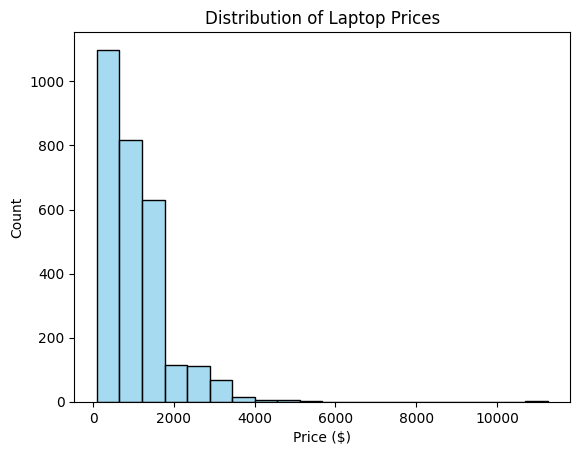

In [51]:
sns.histplot(df['price'], bins=20, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

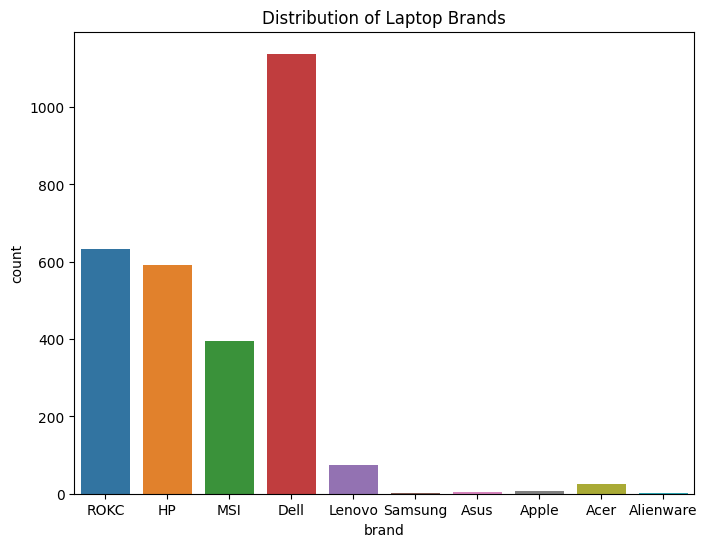

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='brand', data=df)
plt.title('Distribution of Laptop Brands')
plt.show()

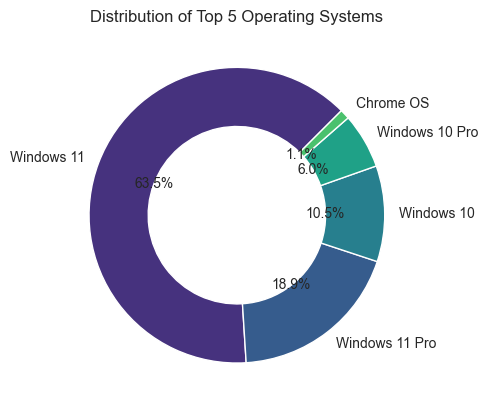

In [4]:
os_counts = df['OS'].value_counts()

os_counts_top5 = os_counts.head(5)

plt.pie(os_counts_top5, labels=os_counts_top5.index, autopct='%1.1f%%', startangle=45, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.4))

plt.title('Distribution of Top 5 Operating Systems')

plt.show()

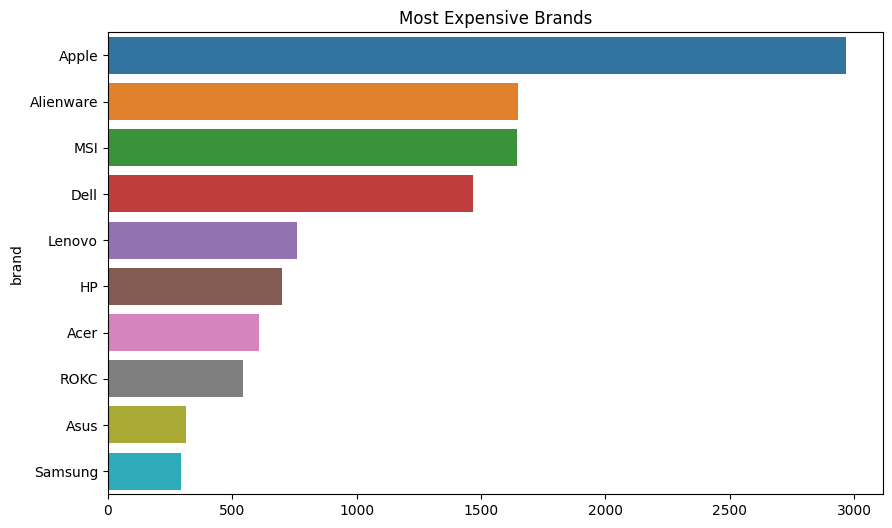

In [32]:
temp = df.groupby('brand').price.mean()
temp2 = temp.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.title('Most Expensive Brands')
sns.barplot(y=temp2.index,x=temp2.values);

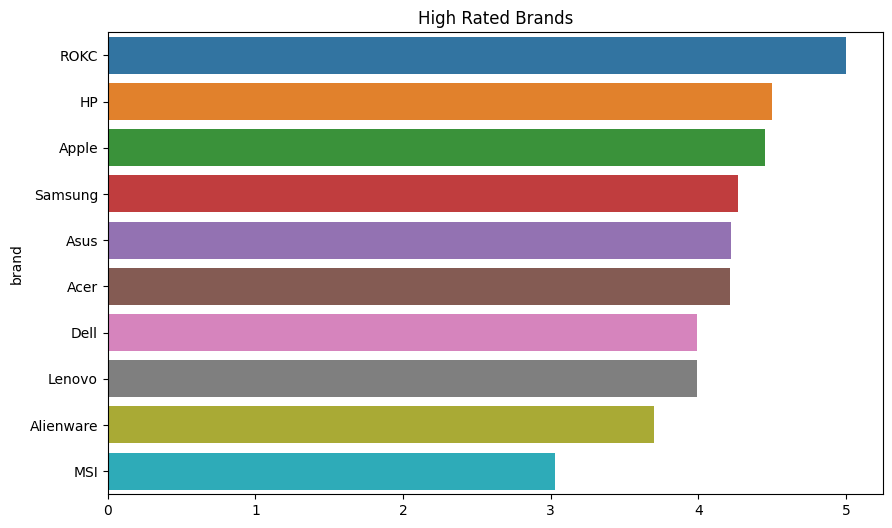

In [33]:
temp = df.groupby('brand').rating.mean()
temp2 = temp.sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.title('High Rated Brands')
sns.barplot(y=temp2.index,x=temp2.values);

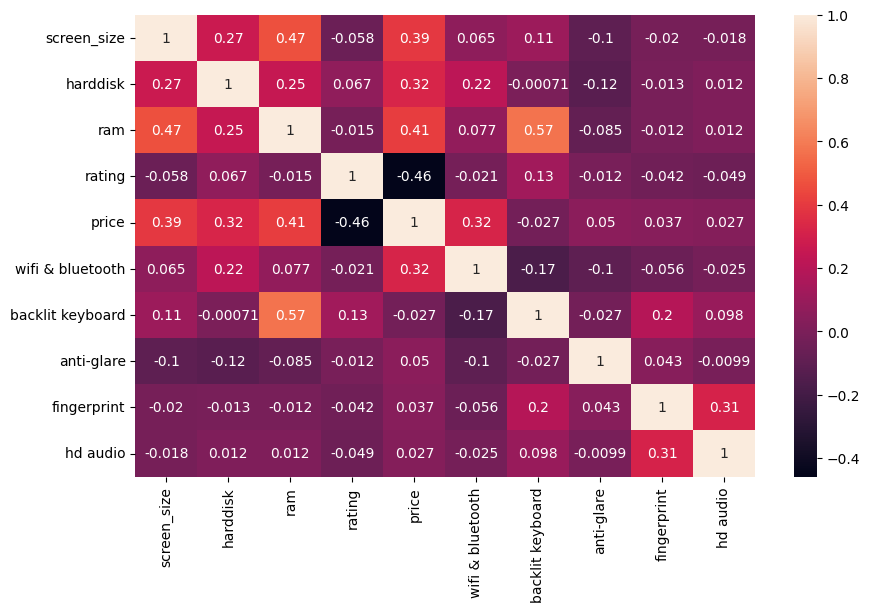

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True);

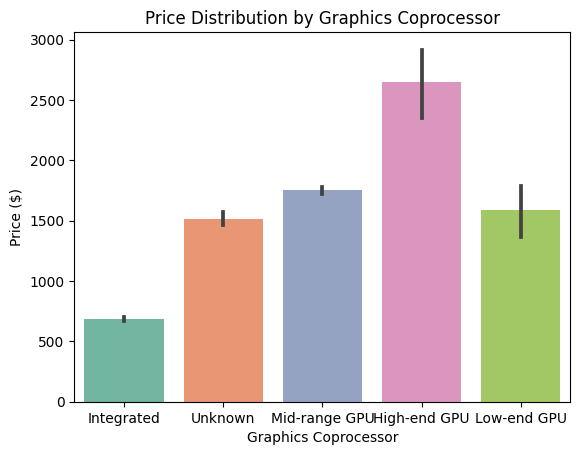

In [61]:
sns.barplot(x='graphics_coprocessor', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Graphics Coprocessor')
plt.xlabel('Graphics Coprocessor')
plt.ylabel('Price ($)')
plt.show()

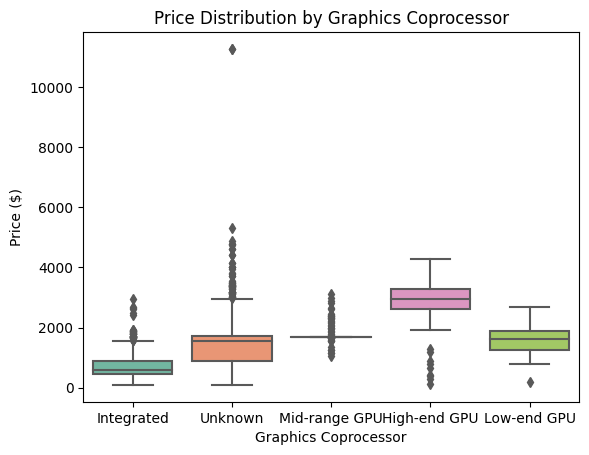

In [59]:
sns.boxplot(x='graphics_coprocessor', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Graphics Coprocessor')
plt.xlabel('Graphics Coprocessor')
plt.ylabel('Price ($)')
plt.show()

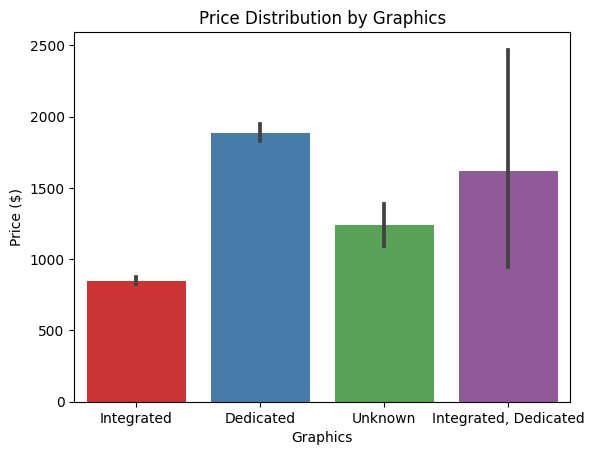

In [63]:
sns.barplot(x='graphics', y='price', data=df, palette='Set1')
plt.title('Price Distribution by Graphics')
plt.xlabel('Graphics')
plt.ylabel('Price ($)')
plt.show()

C:\Users\milam\AppData\Local\Temp\ipykernel_10420\3037436987.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='screen_size_bin', y='price', data=df, ci=None, palette='viridis')
C:\Users\milam\AppData\Local\Temp\ipykernel_10420\3037436987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='screen_size_bin', y='price', data=df, ci=None, palette='viridis')


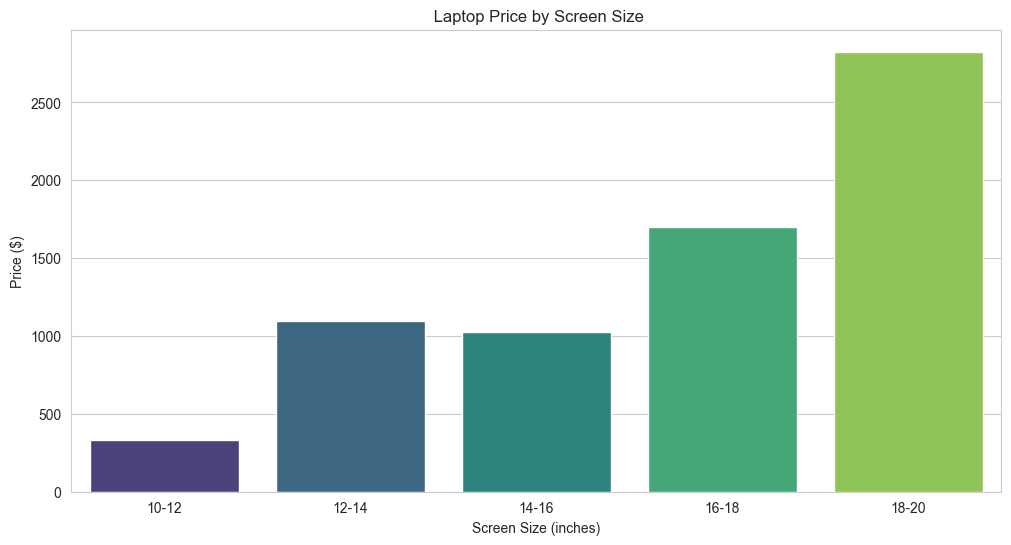

In [5]:
bins = [10, 12, 14, 16, 18, 20]
labels = ['10-12', '12-14', '14-16', '16-18', '18-20']

df['screen_size_bin'] = pd.cut(df['screen_size'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))

sns.barplot(x='screen_size_bin', y='price', data=df,  errorbar=None, palette='viridis')
plt.title(' Laptop Price by Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price ($)')
plt.show()

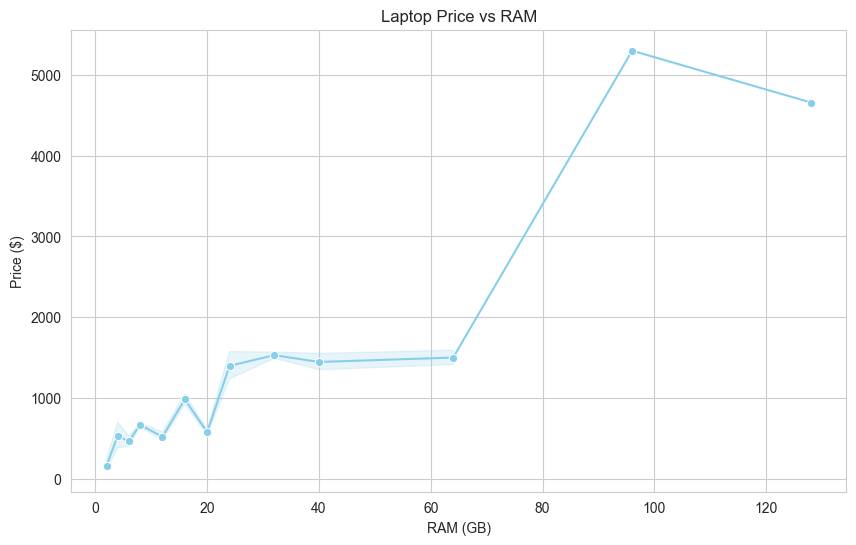

In [6]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='ram', y='price', data=df, marker='o', color='skyblue')
plt.title('Laptop Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')

plt.show()

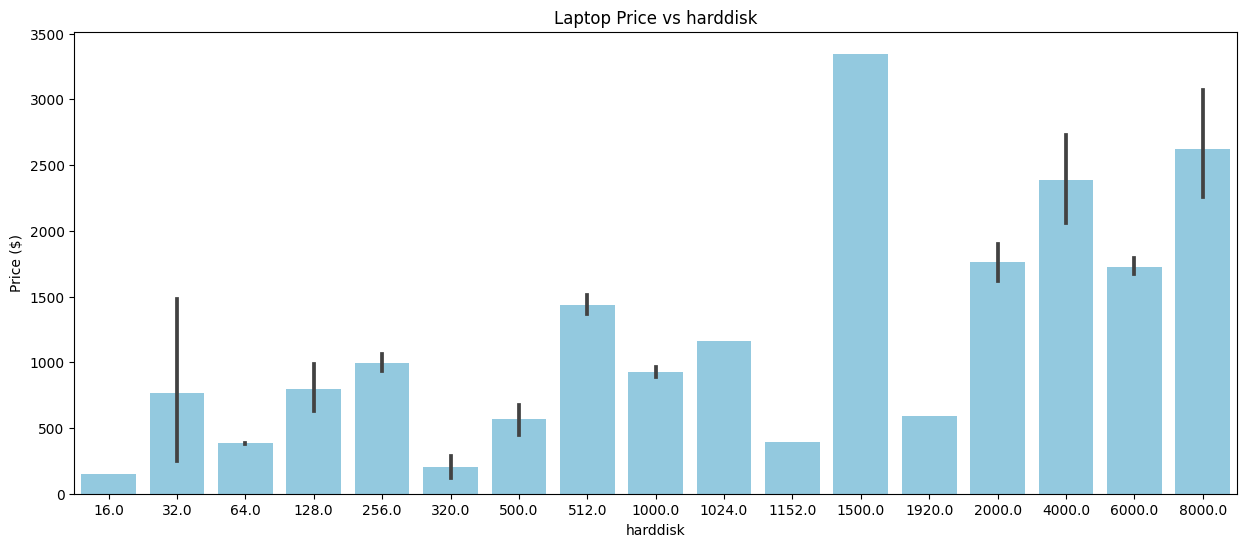

In [86]:
plt.figure(figsize=(15, 6))

sns.barplot(x='harddisk', y='price', data=df, color='skyblue')
plt.title('Laptop Price vs harddisk')
plt.xlabel('harddisk')
plt.ylabel('Price ($)')

plt.show()

C:\Users\milam\AppData\Local\Temp\ipykernel_10420\1002078072.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cpu', y='price', data=df.sort_values(by='price', ascending=False), palette='viridis')


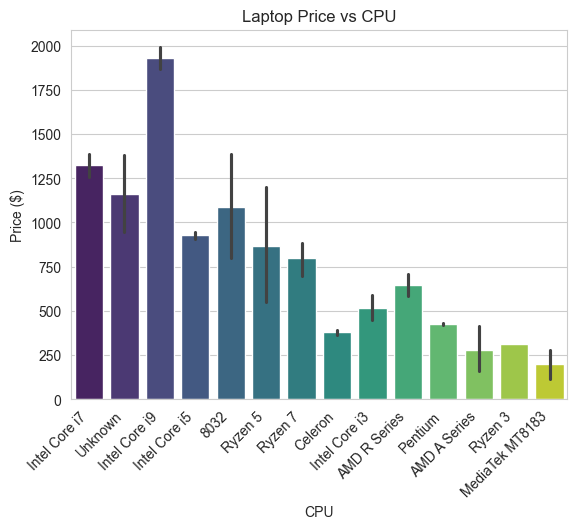

In [7]:
sns.barplot(x='cpu', y='price', data=df.sort_values(by='price', ascending=False), palette='viridis')
plt.title('Laptop Price vs CPU')
plt.xlabel('CPU')
plt.ylabel('Price ($)')

plt.xticks(rotation=45, ha='right')

plt.show()

In [166]:
df.isnull().sum()

brand                      0
model                      0
screen_size                0
color                      0
harddisk                   0
cpu                        0
ram                        0
OS                         0
graphics                   0
graphics_coprocessor       0
rating                  1489
price                      0
wifi & bluetooth           0
backlit keyboard           0
anti-glare                 0
fingerprint                0
hd audio                   0
dtype: int64

In [7]:
df_copy=df.copy()

In [8]:
df_copy.drop('rating',axis=1,inplace=True)

In [9]:
label_encoder = LabelEncoder()

df_copy[['color', 'graphics', 'graphics_coprocessor']] = df_copy[['color', 'graphics', 'graphics_coprocessor']].apply(label_encoder.fit_transform)

In [10]:
categorical_cols = ['brand', 'model' , 'cpu', 'OS']

df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
df_encoded.head()

,screen_size,color,harddisk,ram,graphics,graphics_coprocessor,price,wifi & bluetooth,backlit keyboard,anti-glare,...,OS_Unknown,OS_Windows,OS_Windows 10,OS_Windows 10 Pro,OS_Windows 10 S,OS_Windows 11,OS_Windows 11 Pro,OS_Windows 11 S,OS_Windows 7,OS_Windows 8
0,14.00,1,1000.0,8.0,1,1,589.99,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1,15.60,7,1000.0,64.0,1,1,999.99,0,1,0,...,False,False,False,False,False,False,True,False,False,False
2,15.66,0,1000.0,32.0,0,4,1599.00,0,0,0,...,False,False,False,False,False,True,False,False,False,False
12,15.60,1,1152.0,20.0,1,1,389.99,0,0,0,...,False,False,False,False,False,True,False,False,False,False
13,15.60,0,1000.0,16.0,1,1,459.99,0,0,0,...,False,False,False,False,False,True,False,False,False,False


In [45]:
df_encoded.shape

(2872, 87)

In [11]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print('Linear Regression:')
print(f'Mean Squared Error: {mse_linear}')
print(f'R-squared: {r2_linear}\n')

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print('Decision Tree:')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-squared: {r2_dt}\n')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest:')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}\n')

# Support Vector Machine (SVM) with a radial basis function (RBF) kernel
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print('Support Vector Machine (SVM):')
print(f'Mean Squared Error: {mse_svm}')
print(f'R-squared: {r2_svm}')

Linear Regression:
Mean Squared Error: 89742.66726796761
R-squared: 0.8202820697491258

Decision Tree:
Mean Squared Error: 104785.60109593914
R-squared: 0.7901572137049945

Random Forest:
Mean Squared Error: 80171.81260428949
R-squared: 0.8394485848890443

Support Vector Machine (SVM):
Mean Squared Error: 443083.42446481495
R-squared: 0.11268476414329931


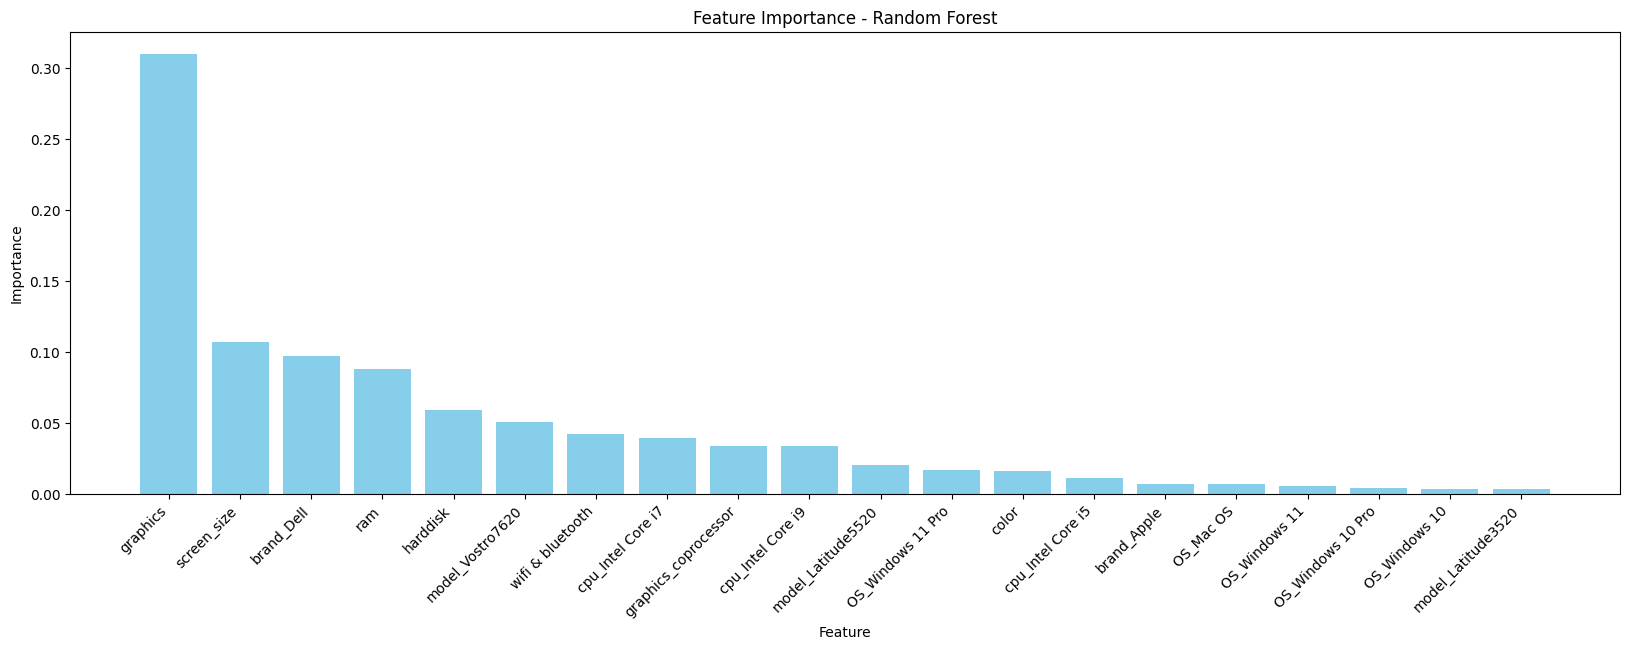

In [190]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(20, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
#Keras with ohe and label encoder
keras_model = Sequential()
keras_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(1, activation='linear'))
keras_model.compile(optimizer='adam', loss='mean_squared_error')

keras_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

keras_model.save('my_model.keras')
y_pred = keras_model.predict(X_test_scaled)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Deep Learning Keras')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R-squared: {r2}')



Epoch 1/100

58/58 [==============================] - 2s 5ms/step - loss: 1835095.8750 - val_loss: 1832946.1250
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 1636506.6250 - val_loss: 1320323.8750
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 725881.9375 - val_loss: 244503.4062
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 203832.6094 - val_loss: 153031.7344
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 167634.2500 - val_loss: 131944.2031
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 158199.3594 - val_loss: 125004.7656
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 153144.0156 - val_loss: 115902.9297
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 149545.5469 - val_loss: 111483.5625
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 146966.4688 - val_loss: 108766.3125
Epoch 10/100

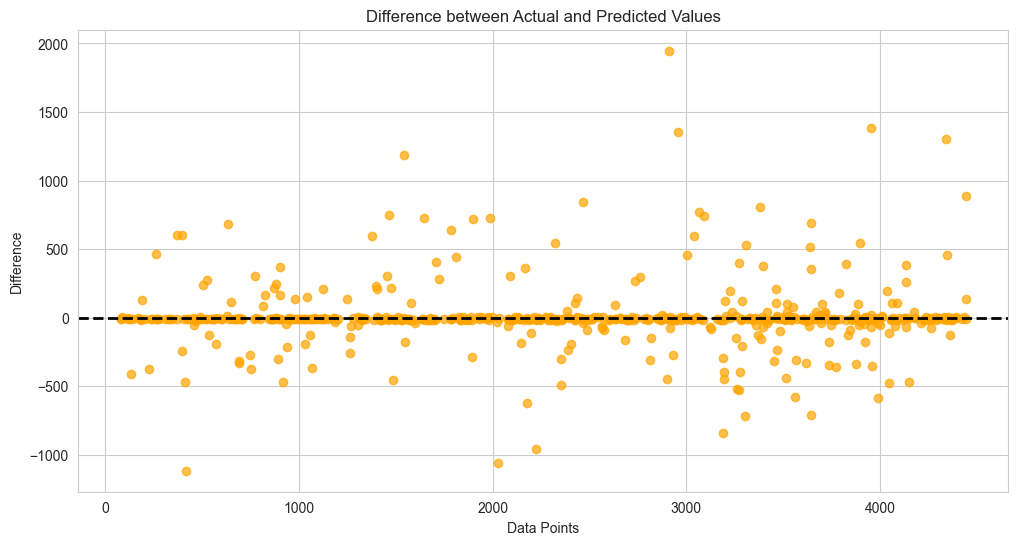

In [51]:
predictions_df['Difference'] = predictions_df['Actual'] - predictions_df['Predicted']

plt.figure(figsize=(12, 6))
plt.scatter(predictions_df.index, predictions_df['Difference'], color='orange', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Difference between Actual and Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Difference')
plt.show()

Dropping column model and trying neural network again.

In [226]:
df_no_model = df_copy.copy()

In [227]:
df_no_model.drop('model',axis=1,inplace=True)

In [228]:
label_encoder = LabelEncoder()

df_no_model[['color', 'graphics', 'graphics_coprocessor']] = df_no_model[['color', 'graphics', 'graphics_coprocessor']].apply(label_encoder.fit_transform)

In [229]:
categorical_cols = ['brand',  'cpu', 'OS']

df_no_model = pd.get_dummies(df_no_model, columns=categorical_cols, drop_first=True)
df_no_model.head()

,screen_size,color,harddisk,ram,graphics,graphics_coprocessor,price,wifi & bluetooth,backlit keyboard,anti-glare,...,OS_Unknown,OS_Windows,OS_Windows 10,OS_Windows 10 Pro,OS_Windows 10 S,OS_Windows 11,OS_Windows 11 Pro,OS_Windows 11 S,OS_Windows 7,OS_Windows 8
0,14.00,1,1000.0,8.0,1,1,589.99,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,15.60,7,1000.0,64.0,1,1,999.99,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,15.66,0,1000.0,32.0,0,4,1599.00,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,15.60,1,1152.0,20.0,1,1,389.99,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,15.60,0,1000.0,16.0,1,1,459.99,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [230]:
X = df_no_model.drop('price', axis=1)
y = df_no_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [232]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

predictions_df_no_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Deep Learning Keras')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f'R-squared: {r2}')

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 1836369.7500 - val_loss: 1833991.2500
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 1650734.5000 - val_loss: 1327174.3750
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 753265.8125 - val_loss: 216184.7969
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 221004.9375 - val_loss: 134272.3750
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 187730.3594 - val_loss: 120949.4297
Epoch 6/100
58/58 [==============================] - 0s 4ms/step - loss: 179902.3281 - val_loss: 116341.7969
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 176024.2031 - val_loss: 113812.3984
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 174062.3594 - val_loss: 111925.6641
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: 171863.5938 - val_loss: 110626.1016
Epoch 10/100
58

=> Better results without dropping the column model.

Random Forest only with label encoder

In [29]:
X = df_copy.drop('price', axis=1)
y = df_copy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
df_copy

,brand,model,screen_size,color,harddisk,cpu,ram,OS,graphics,graphics_coprocessor,price,wifi & bluetooth,backlit keyboard,anti-glare,fingerprint,hd audio
0,8,33,14.00,1,1000.0,6,8.0,7,1,1,589.99,0,0,0,0,0
1,5,33,15.60,7,1000.0,5,64.0,8,1,1,999.99,0,1,0,0,0
2,7,34,15.66,0,1000.0,7,32.0,7,0,4,1599.00,0,0,0,0,0
12,8,33,15.60,1,1152.0,9,20.0,7,1,1,389.99,0,0,0,0,0
13,5,33,15.60,0,1000.0,9,16.0,7,1,1,459.99,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,7,31,15.60,0,1000.0,7,32.0,7,0,3,1699.00,0,0,0,0,0
4442,8,33,14.00,1,1000.0,6,8.0,7,1,1,589.99,0,0,0,0,0
4443,4,7,15.60,0,512.0,4,8.0,4,1,4,591.99,1,0,0,0,0
4444,4,10,14.00,8,512.0,5,8.0,5,1,1,1771.99,0,0,0,0,0


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Random Forest with only label encoder
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest:')
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R-squared: {r2_rf}\n')

Random Forest:
Mean Squared Error: 95525.5618878481
Mean Absolute Error: 125.39311782523669
R-squared: 0.8087012923599207



Pickle


In [94]:
data = {
    "label_encoder": label_encoder,
    "scaler": scaler,
    "df": df,
    "df_encoded" : df_encoded
}
with open('saved_steps.pkl','wb') as file:
  pickle.dump(data,file)

In [95]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

label_encoder = data["label_encoder"]
scaler = data["scaler"]
df = data ["df"]
df_encoded = data ["df_encoded"]

In [25]:
new_laptop_data = np.array([["ROKC", "Unknown", 14.00, "Blue", 1000.0, "Intel Core i7", 8.0, "Windows 11", "Integrated", "Integrated", 'yes', 'yes', 'yes', 'yes', 'yes']])

new_laptop_df = pd.DataFrame(new_laptop_data, columns=df_copy.drop('price',axis=1).columns)

# Create DataFrames with all possible categories for each column
all_graphics = df['graphics'].unique()
all_graphics_df = pd.DataFrame({'graphics': all_graphics})

all_colors = df['color'].unique()
all_colors_df = pd.DataFrame({'color': all_colors})

all_gc = df['graphics_coprocessor'].unique()
all_gc_df = pd.DataFrame({'graphics_coprocessor': all_gc})

# Merge the new input data with the DataFrames of all categories
new_laptop_df = pd.merge(new_laptop_df, all_graphics_df, how='outer', on=['graphics'])
new_laptop_df = pd.merge(new_laptop_df, all_colors_df, how='outer', on=['color'])
new_laptop_df = pd.merge(new_laptop_df, all_gc_df, how='outer', on=['graphics_coprocessor'])
new_laptop_df['color'].fillna('Blue',inplace=True)
new_laptop_df['graphics'].fillna('Integrated',inplace=True)
new_laptop_df['graphics_coprocessor'].fillna('Integrated',inplace=True)

label_cols = ['color', 'graphics', 'graphics_coprocessor', 'wifi & bluetooth', 'backlit keyboard', 'anti-glare', 'fingerprint', 'hd audio']
new_laptop_df[label_cols] = new_laptop_df[label_cols].apply(label_encoder.fit_transform)

new_laptop_df = new_laptop_df.iloc[[0]]

# categorical_cols = ['brand', 'model' , 'cpu', 'OS']
new_laptop_encoded = pd.get_dummies(new_laptop_df, columns=categorical_cols)

missing_cols = set(df_encoded.drop('price',axis=1).columns) - set(new_laptop_encoded.columns)
for col in missing_cols:
    new_laptop_encoded[col] = 0

new_laptop_encoded = new_laptop_encoded[df_encoded.drop('price',axis=1).columns]

new_laptop_scaled = scaler.transform(new_laptop_encoded)

new_laptop_price_pred = keras_model.predict(new_laptop_scaled)

print('Predicted Price for the New Laptop:', new_laptop_price_pred.flatten()[0])

1/1 [==============================] - 0s 32ms/step
Predicted Price for the New Laptop: 576.37213


In [3]:
import tensorflow as tf
import keras

print(f'TensorFlow version: {tf.__version__}')
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.15.0
Keras version: 2.15.0
